<a href="https://colab.research.google.com/github/Cirediallo/DLIL/blob/main/03_Repr%C3%A9sentation_des_textes_%C3%A0_l'aide_du_vocabulaire_ou_des_th%C3%A8mes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modélisation du contenu des textes - approches traditionnelles

Représentation du sens au niveau des mots, et des documents - approche naive à la Salton et Spark Jones



## Modèle "sac de mots"

Le [**sac de mots** ou *BOW* pour *Bag Of Words* en anglais](https://fr.wikipedia.org/wiki/Sac_de_mots) est un modèle classique utilisé en Recherche d'Information (RI) pour représenter le contenu d'un document. Chaque document est décrit vis-à-vis d'un vocabulaire donné commun. 

Différentes vues sont possibles : 
- compter binairement si les mots du vocabulaire sont présents dans le document, 
- compter les occurrences des mots du vocabulaire dans le document, 
- pondérer les mots en tenant compte de leurs spécificités dans le document vis-à-vis des autres documents (on parle de pondération _tf-idf_).

La **vectorisation** est le processus qui désigne transformation des textes en vecteurs (de mots selon une modélisation *bow*).

On doit à [Karen Spärck Jones](https://fr.wikipedia.org/wiki/Karen_Sp%C3%A4rck_Jones) la proposition de la pondération _tf-idf_ des termes.
> « La spécificité d'un terme peut être quantifiée comme une fonction inverse du nombre de documents dans lesquels il apparaît. » 

[Gérard Salton](https://fr.wikipedia.org/wiki/Gerard_Salton), quant à lui, est reconnu comme étant le père de la recherche d'information en ayant proposé une modélisation des documents dans un espace vectoriel. 


* Karen Spärck Jones, « A statistical interpretation of term specificity and its application in retrieval », Journal of Documentation, vol. 28, no 1,‎ 1972, p. 11–21 (DOI 10.1108/eb026526)
* G. Salton , A. Wong , C. S. Yang, A vector space model for automatic indexing, Communications of the ACM, v.18 n.11, p. 613-620, novembre 1975

Par la suite nous utiliserons le module python sklearn qui offre des facilités pour pré-traiter (normaliser) et vectoriser aisément les textes, puis de réaliser des opérations de calcul de similarités inter-documents ou de clustering au sein d'un ensemble de documents.


## Préparation d'un jeu de données "jouet"

Le code suivant définit un corpus de **huit documents**, chacun pré-classé dans une catégorie thématique. Lisez les phrases et constatez qu'il y a **trois catégories** thématiques qui émergent de ce corpus. Les documents sont ici simplifiées à une seule phrase. On peut aussi constater que les documents ne sont pas normalisés.

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 200
import numpy as np

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


## Vectorisation avec occurrences

Le code suivant réalise une vectorisation du corpus en comptant les occurrences des mots. La vectorisation prend en charge la construction d'un vocabulaire sur le corpus ainsi que quelques pré-traitements de normalisation linguistiques. Enfin le résultat de la vectorisation est affiché sous la forme d'une matrice **document-terme** (les documents sont en ligne et les mots en colonne). 
Nous aurons une matrice de dimension _nb de documents * taille du vocabulaire_.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# define the vectorizer
c_vectorizer = CountVectorizer(stop_words='english')
#c_vectorizer = CountVectorizer()

# display the configuration of the vectorizer
print (c_vectorizer)


# perform the vectorization
c_matrix = c_vectorizer.fit_transform(corpus)
print ('Matrix dimensions:', c_matrix.get_shape())
print("============== Elements ==========")
print(len(c_vectorizer.get_feature_names_out()))

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocab = c_vectorizer.get_feature_names()
print(vocab)
print ('Vocabulary size:', len(vocab))

# show document-term matrix
c_matrix = c_matrix.toarray()
pd.DataFrame(c_matrix, columns=vocab)

CountVectorizer(stop_words='english')
Matrix dimensions: (8, 20)
============== Elements ==========
20
['bacon', 'beans', 'beautiful', 'blue', 'breakfast', 'brown', 'dog', 'eggs', 'fox', 'green', 'ham', 'jumps', 'king', 'lazy', 'love', 'quick', 'sausages', 'sky', 'toast', 'today']
Vocabulary size: 20


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,king,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


### QUESTION : configuration du vectorizer

Pour vous aider dans les questions suivantes, consulter l'affichage du paramétrage du `CountVectorizer` (via la ligne `print (vectorizer)`). Consulter aussi la documentation https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Si besoin, vous pouvez aussi consulter une aide sur les expressions régulières en dessous des questions.

Répondez aux questions suivantes :
* Quels prétraitements de normalisation sont opérées (mentionner les paramètres impliqués) ? 
* D'autres pré-traitement de normalisation sont-ils possibles même s'ils ne sont pas utilisées ici (mentionner les paramètres impliqués) ? 
* Comment expliquez-vous que les mots du vocabulaire ne comptent de marques de ponctuation accolées ? 
* Le paramètre `max_df` permet de fixer une fréquence documentaire maximale pour les mots à considérer dans le vocabulaire. Expliquez pourquoi les valeurs `1` et `1.0` n'ont pas la même signification.
* Comment paramétrer le `CountVectorizer` pour qu'il binarise les valeurs au lieu de compter les nombres d'occurrences ?

Explicitation de quelques séquences spéciales de caractères dans les expressions régulières :   
* `(?u)` switches on the re.U (re.UNICODE) flag for this expression https://docs.python.org/2/library/re.html#re.U. Note that for backward compatibility, the re.U flag still exists (as well as its synonym re.UNICODE and its embedded counterpart (?u)), but these are redundant in Python 3 since matches are Unicode by default for strings (and Unicode matching isn’t allowed for bytes).
* `\w` represents a word character. For Unicode (str) patterns: 
matches characters considered alphanumeric in the ASCII character set; this is equivalent to `[a-zA-Z0-9_]`. For 8-bit (bytes) patterns: Matches Unicode word characters; this includes most characters that can be part of a word in any language, as well as numbers and the underscore. https://docs.python.org/3/library/re.html
* `\b` represents a word boundary between a word character and a non-word character. 


### VOTRE REPONSE

1. On a les fonctions ***build_tokenize()*** et ***build_tokenizer()***
2. 
3. 
4. Si la valeur fournie est une décimal, dans ce cas le paramètre répresente une proportion de documents. Sinon, le paramètre répresente le compte exacte.
5. On met le paramètre ***binary*** à *True* 



### QUESTION : matrice creuse ou matrice dense


Une [**matrice creuse**, ou _sparse matrix_ en anglais](https://fr.wikipedia.org/wiki/Matrice_creuse), est une matrice qui contient beaucoup de valeurs nulles. A l'inverse on parle de **matrice pleine** (ou _dense matrix_). 

* Selon vous, la matrice obtenue après vectorisation est-elle creuse ou pleine ? Pour vous aider dans votre réponse, diriez-vous que la majorité des mots du vocabulaire se produit dans chaque document ?



### VOTRE REPONSE

**TODO**


## Vectorisation avec TF-IDF

La vectorisation avec occurrences présente des limites lorsqu'elle est utilisée sur de large corpus. En effet, le modèle présume que l'importance des mots est fonction de sa fréquence et qu'un mot plus fréquent qu'un autre dans un document est plus discriminant que l'autre. Le problème intervient quand un mot fréquent, supposé important, apparaît dans plusieurs documents. Le fait qu'il apparaisse dans plusieurs documents peut au final le rendre moins discriminant que d'autres pourtant moins fréquents. Le problème vient du fait que l'on prenne des valeurs absolues. 

Le modèle **TF-IDF** vise à solutionner ce problème en normalisant le compte des occurrences. TF-IDF correspond à _Term Frequency-Inverse Document Frequency_. 

On définit le TF-IDF comme suit: `tfidf = tf x idf`
* `tfidf(w, D)` est le score TF-IDF du mot `w` dans le document `D`
* `tf(w, D)` représente le nombre d'occurrence du terme `w` dans le document `D` 
* `idf(w, D)` représente la fréquence inverse documentaire du terme `w`, qui peut être calculée comme le log du nombre total de documents dans le corpus `C` divisé par la fréquence documentaire du terme `w` (i.e. le nombre de documents du corpus `C` dans lequel le terme `w` se produit).


### QUESTION

La vectorisation TF-IDF est prise en charge par la classe `sklearn.feature_extraction.text.TfidfVectorizer` décrite dans la documentation :
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

* Complétez la cellule de code ci-dessous pour opérer une vectorisation de type TF-IDF, et afficher le résultat. La ligne de code suivante permet d'arrondir des valeurs réelles à deux chiffres après la virgule `matrix = np.round(matrix, 2)`, ce qui facilite la visualisation.
* Après avoir consulté la documentation, est-il possible d'implémenter des variantes au calcul du TD-IDF ? 
* Par défaut les modèles sac de mots ne capturent pas l'ordre des mots. Que cela soit pour la classe `CountVectorizer` ou `TfidfVectorizer`, quel paramètre offre un moyen de considérer l'ordre des mots dans une modélisation ?

### VOTRE REPONSE

**TODO**


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TODO

# define the vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

# display the configuration of the vectorizer
print (tfidf_vectorizer)

# perform the vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus) #TODO
print ('Matrix dimensions:', tfidf_matrix.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocab = tfidf_vectorizer.get_feature_names_out()
print(vocab, "\Vocabulary lenght: ", len(vocab))

# show document-term matrix
tfidf_matrix  = tfidf_matrix.toarray()
pd.DataFrame(tfidf_matrix, columns=vocab)


TfidfVectorizer(stop_words='english')
Matrix dimensions: (8, 20)
['bacon' 'beans' 'beautiful' 'blue' 'breakfast' 'brown' 'dog' 'eggs' 'fox'
 'green' 'ham' 'jumps' 'king' 'lazy' 'love' 'quick' 'sausages' 'sky'
 'toast' 'today'] \Vocabulary lenght:  20


,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,king,lazy,love,quick,sausages,sky,toast,today
0,0.000000,0.000000,0.600978,0.526925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600978,0.000000,0.000000
1,0.000000,0.000000,0.493162,0.432394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571505,0.000000,0.000000,0.493162,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.380362,0.380362,0.000000,0.380362,0.000000,0.000000,0.525949,0.000000,0.380362,0.000000,0.380362,0.000000,0.000000,0.000000,0.000000
3,0.321164,0.383215,0.000000,0.000000,0.383215,0.000000,0.000000,0.321164,0.000000,0.000000,0.321164,0.000000,0.383215,0.000000,0.000000,0.000000,0.321164,0.000000,0.383215,0.000000
4,0.394554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.394554,0.000000,0.470784,0.394554,0.000000,0.000000,0.000000,0.394554,0.000000,0.394554,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.365048,0.000000,0.416351,0.416351,0.000000,0.416351,0.000000,0.000000,0.000000,0.000000,0.416351,0.000000,0.416351,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.360826,0.316365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.721652,0.000000,0.498935
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000


## Partitionnement sur la base d'une représentation bow des documents avec la méthode des k-moyennes

Le partitionnement en [**k-moyennes** (ou _k-means_ en anglais)](https://fr.wikipedia.org/wiki/K-moyennes) est une des méthodes de partitionnement les plus populaires. 
> Étant donnés des points et un entier k, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction. On considère la distance d'un point à la moyenne des points de son cluster ; la fonction à minimiser est la somme des carrés de ces distances. 

Ci-dessus, les processus de vectorisation vous ont conduit à avoir 2 matrices document-terms : 
- dans la première, `c_matrix`, les termes sont représentés par leur nombre d'occurrences
- dans la seconde, `tfidf_matrix`, par un score tf-idf 



#### QUESTION

Ci-dessous un code qui réalise un clustering kmeans sur une matrice document-term donnée en entrée, à savoir la matrice `c_matrix`.
Le nombre de catégories étant connu (3), il est spécifié en paramètre (`n_clusters=3`).

* Dupliquez le code et modifiez le pour considérer comme input,`dt_matrix`, au clustering kmeans, la matrice document-term `tfidf_matrix`. Pour chacune des deux représentations (`c_matrix` et `tfidf_matrix`), en regardant le `ClusterLabel` produit, pouvez-dire que le clustering produit est correct ? 

In [21]:
dt_matrix = c_matrix 

# clustering des documents selon la méthode kmeans 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(dt_matrix)

# affichage des clusters
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


In [22]:
dt_matrix = tfidf_matrix 

# clustering des documents selon la méthode kmeans 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(dt_matrix)

# affichage des clusters
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


#### VOTRE REPONSE

Yes, according to the **ClusterLabel** above produced the cluster is correct because similar to the previous one.

## Similarité entre documents 

Une représentation vectorielle des documents offre la possibilité d'utiliser des mesures de distance ou de similarité pour comparer les documents un à un.

Si le corpus compte C documents, une comparaison de chaque paire de documents produira une matrice de dimensions C x C où chaque intersection d'une ligne et d'une colonne donne un score de similarité entre une paire de documents.

Parmi les mesures les plus communes on retrouve la similarité cosinus, la distance euclidienne, la distance manhattan, la similarité BM25, la distance Jaccard...

Ci-dessous nous utilisons la mesure de cosinus sur une modélisation TF-IDF des documents. La mesure de cosinus représente la valeur du cosinus de l'angle entre les vecteurs de deux documents. Moins l'angle entre les vecteurs est grand, plus proches et similaires sont les documents.


### QUESTION

Le code ci-dessous permet de calculer la matrice de similarité entre paires de documents. 
* En analysant la matrice, quels ensembles de documents vous semblent similaires ? A minima vérifier votre intuition à la lecture des documents du corpus.

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)
print(similarity_matrix.shape)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

(8, 8)


,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


### VOTRE REPONSE

Documents 5 and 7 are quite similar (score = 0.930989), 2 and 7 (score = 0.850516), 1 and 0(score = 0.820599) ...



##Partitionnement hiérarchique des documents sur la base de la matrice de similarités inter-documents 

Le [**partitionnement**, ou _Clustering_ en anglais,](https://fr.wikipedia.org/wiki/Partitionnement_de_donn%C3%A9es) désigne des techniques non supervisées qui permettent de grouper des points (ici des documents) en groupes ou clusters.

Il existe deux types d'algorithmes de partionnement hiérarchique : agglomératif ou clivant.

Nous utiliserons un algorithme hiérarchique de clustering agglomératif qui débutera avec 1 document dans chaque cluster et aggrégera deux clusters à chaque itération. Nous utiserons le [critère de liaison de Ward ](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Ward) pour choisir des paires de clusters à lier. 
> La méthode de Ward consiste à regrouper les classes de façon que l'augmentation de l'inertie interclasse soit maximale, ou, de façon que l'augmentation de l'inertie intraclasse (la variance intra-cluster) soit minimale.

Le code ci-dessous produit la matrice de liaison (_linkage_). Chaque ligne représente une étape qui indique quels points (clusters) sont fusionnés ensembles. Les deux premières colonnes indiquent les identifiants des clusters fusionnés, la troisième colonne est la distance entre les deux clusters fusionnés, et la quatrième colonne indique le nombre total d'éléments ainsi regroupés.


**Note:** la méthode de Ward est un algorithme permettant de regrouper deux classes d'une partition pour obtenir une partition plus agrégée. 

In [24]:
from scipy.cluster.hierarchy import linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2.0,7.0,0.253098,2.0
1,0.0,6.0,0.308539,2.0
2,5.0,8.0,0.386952,3.0
3,1.0,9.0,0.489845,3.0
4,3.0,4.0,0.732945,2.0
5,11.0,12.0,2.695647,5.0
6,10.0,13.0,3.451082,8.0


La construction de cette matrice peut est visualisée sous la forme d'un dendogramme. La ligne en pointillée représente la valeur maximale de distance à partir de laquelle il ne faut plus chercher à regrouper. Elle est arbitrairement fixée ici à `0.1`. On remarque qu'avec cette valeur, on obtient autant de clusters que de documents dans le corpus. 

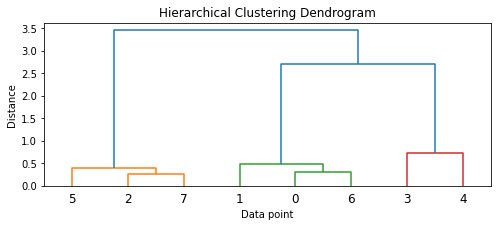

In [47]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# seuil maximale pour la mesure de distance 
max_dist = 10

# plot the dendogram
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)

# plot the threshold (seuil de distance)
plt.axhline(y=max_dist, c='k', ls='--', lw=0.5)


> Question: when I change the ***max_dist*** the fusion doesn't change. Need some clarifications

### QUESTION

Le code ci-dessous vous permet de stopper le clustering à un seuil maximal de distance préfixé.

* En jouant avec la valeur de la distance maximale, y-a-t'il moyen d'identifier nos principaux clusters ? Si oui autour de quelle valeur ?  

In [40]:
max_dist = 0.4

# Flatten clusters from the hierarchical clustering defined by the given linkage matrix
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(Z, max_dist, criterion='distance')

# Concaténation de la colonne des labels des clusters avec le corpus et les catégories manuelles 
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,3
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,4
4,"I love green eggs, ham, sausages and bacon!",food,5
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


### VOTRE REPONSE

**TODO**


## Partitionnement des documents sur la base de la matrice de similarités inter-documents avec la méthode des k-moyennes


La matrice de similarités cosinus inter-documents peut être vue comme matrice _document-similarity_score_.

### QUESTION

* En regardant le `ClusterLabel` produit, pouvez-vous dire si la catégorisation est correcte ? 

In [ ]:
from sklearn.cluster import KMeans

# clusetering
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(similarity_matrix)

# affichage
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

### VOTRE REPONSE

**TODO**


# Topic modeling with LDA's gensim 
L'[**allocation de Dirichlet latente** (de l'anglais _Latent Dirichlet Allocation_) ou LDA](https://fr.wikipedia.org/wiki/Allocation_de_Dirichlet_latente) est ...
> ... un modèle génératif probabiliste permettant d'expliquer des ensembles d’observations, par le moyen de groupes non observés, eux-mêmes définis par des similarités de données. 

Dans ce modèle chaque document consiste en une combinaison de plusieurs thèmes et chaque terme peut être assigné (avec une certaine probabilité) à un certain thème. 
L'algorithme est itératif. 
- Initialement les thèmes sont assignés aléatoirement à chaque terme pour chaque document. 
- Puis pendant un nombre d'itération prédéfini, on répète pour chaque document :  
  - calculer `P(T|D)`, la probabilité du thème `T` donné la proportion de termes associés à ce thème `T` dans le document `D` 
  - calculer `P(W|T)`, la probabilité d'assigner le thème `T` au terme `W` donné la proportion de thèmes `T` assignés au terme `W` dans le corpus
  - réassigner le terme `W` au thème `T` avec la probabilité  `P(T|D)*P(W|T)`


Pour en savoir plus consulter le [tutoriel de Christine Doig](http://chdoig.github.io/pygotham-topic-modeling/) 

Les modules [gensim](https://radimrehurek.com/gensim/models/ldamodel.html) et [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) offrent des implémentations de l'algorithme LDA pour générer des topiques. 





### QUESTION

Ci-dessous nous mettons en oeuvre le module gensim qui offre une API de haut niveau. Le paramètre "important" est le nombre de thèmes (`num_topics=3 
`) souhaités en fin de processus. En connaissance du corpus, nous le fixons à 3.

La méthode `ldamodel.show_topics()` affiche les thèmes et les poids associés à chaque terme pour chaque thème. Plus le poid est élevé plus le terme est significatif pour ce thème.
* Observez les résultats retournés par la méthode `ldamodel.show_topics()`, les poids vous semblent-ils cohérents ? 
* Relancer plusieurs fois la modélisation. Vous pouvez aussi utiliser le module PyLDAvis pour visualiser le topic model généré (cf. ci-dessous).  La modélisation est-elle stable ? Pourquoi ? Spécifier les paramètres suivants `iterations=10000, random_state=1234` dans la classe `LdaModel`. Le modèle est-il plus stable ? 



In [ ]:
from gensim.models import LdaModel
from gensim import corpora

# récupérer une version normalisé du corpus
preprocessed_corpus = tfidf_vectorizer.inverse_transform(tfidf_matrix)

# build a dictionary
dictionary = corpora.Dictionary(preprocessed_corpus)
# and a doc2bow gensim corpus
# doc2bow Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
doc2bow_corpus = [dictionary.doc2bow(document) for document in preprocessed_corpus]
print (doc2bow_corpus)

# then compute a topic model with topics based on gensim LDA
num_topics=3 
ldamodel = LdaModel(doc2bow_corpus, id2word=dictionary, num_topics=num_topics)

# Get a representation for selected topics
ldamodel.show_topics()

 Vous pouvez aussi utiliser le module PyLDAvis pour visualiser le topic model. 

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_display = gensimvis.prepare(ldamodel, doc2bow_corpus, dictionary, mds='mmds')
#print (lda_display)
pyLDAvis.display(lda_display)

### VOTRE REPONSE

**TODO**

## Partitionnement des documents sur la base de la matrice document-topic avec la méthode des k-moyennes

Il s'agit de lancer un clustering k-means des documents non plus sur une représentation des documents en termes d'un sac de mots pondérés avec un score TF-IDF mais d'utiliser la distribution des thèmes générés par l'algorithme LDA sur chaque document.


### QUESTION

Le code suivant permet de faire un partitionnement des documents en 3 groupes  sur la base d'une représentation des documents à base des thèmes qui les composent. Pour chaque document les thèmes ont un score de probabilité différent. Ce nombre 3 correpond au nombre de catégories de documents que nous connaissons être présentes dans ce corpus.

* En utilisant le code de la section précédente (Topic modeling with LDA's gensim) pour générer des modèles de thèmes, générer des modèles avec différents nombre de thèmes générés : 3, 8 ou 10 par exemples. Cela va conduire à représenter chaque document avec 3, 8 ou 10 thèmes par exemples.
Avec combien de thèmes dans la représentation des documents, obtenez-vous le meilleur clustering ? Les vecteurs des thèmes ont-ils toujours un sens pour vous ? Que pouvez-vous dire de cette représentation par rapport à la représentation BOW qui avait pour dimension le vocabulaire ? 

In [ ]:
# Récupère une matrice de distribution des thèmes pour chaque document
dt_matrix = ldamodel.get_document_topics(doc2bow_corpus)

# sklearn.cluster.KMeans utilise une matrice des scores alors que la matrice 
# retournée par gensim contient des tuples (topic_id, score) 
# le code suivant fait la conversion de format
new_dt_matrix = list()
for d in dt_matrix:
  new_dt_matrix.append([c for i, c in d])
print (new_dt_matrix)
dt_matrix = new_dt_matrix

# visualisation de la distribution des thèmes sur chaque document ; ici dans le cas où il y a 3 thèmes
#features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
#features

# clustering des documents selon la méthode kmeans 
# en utilisant la distribution des thèmes et non la distrubution des termes 
# comme traits discriminants entre documents
from sklearn.cluster import KMeans
# Warning: ici n_clusters ne doit pas être touché
km = KMeans(n_clusters=3, random_state=0)
#km.fit_transform(features)
km.fit_transform(dt_matrix)

# affichage des clusters
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

### VOTRE REPONSE

**TODO**


# Conclusion

On retiendra que les vectorisations des documents sous la forme d'un sac de mots d'un vocabulaire permet d'obtenir des résultats intéressants en recherche d'information et en partitionnement mais présente deux défauts :

- un modèle "sac de mots" ne conserve pas l'ordre des mots et leur contexte d'apparition des mots
- les vecteurs sont de grande taille, celle du vocabulaire du corpus. Quitte à être remplis de valeurs nulles.

La représentation d'un document à travers des thèmes globalement générés sur le corpus constitue une représentation plus compacte qu'une représentation avec un vocabulaire comme trait. La matrice de documents est au final non creuse.





# Références
* https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
* word2vec embeddings building, most similar and visualization (ENSAE 2021) https://colab.research.google.com/drive/1Y9fC04hnTspwmqJkK5yZJWwUpDybzq9m#scrollTo=Uy2u0Ngs1R-w
* traditional and Words embeddings avec Word2vec https://github.com/clement-plancq/outils-corpus/blob/master/outils_corpus-7.ipynb
* text preprocessing, Bag of Words Model, Bag of N-Grams Model, TF-IDF Model, Document Similarity, Document Clustering with Similarity Features, Topic Models, Document Clustering with Topic Model Features
  * https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41
  *  Traditional strategies (2020)  https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch04%20-%20Feature%20Engineering%20for%20Text%20Representation/Ch04a%20-%20Feature%20Engineering%20Text%20Data%20-%20Traditional%20Strategies.ipynb
  * With some explanation https://github.com/dipanjanS/nlp_essentials/blob/master/notebooks/02_Text_Representation_Statistical_Models.ipynb
  * Advanced Deep Learning Strategies (2020) https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch04%20-%20Feature%20Engineering%20for%20Text%20Representation/Ch04b%20-%20Feature%20Engineering%20Text%20Data%20-%20Advanced%20Deep%20Learning%20Strategies.ipynb
  * Older version 2018  https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch04_Feature_Engineering_and_Selection/Feature%20Engineering%20on%20Text%20Data.ipynb ; https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch04_Feature_Engineering_and_Selection/Feature%20Engineering%20on%20Text%20Data.ipynb
* https://github.com/fastai/course-nlp/blob/master/2-svd-nmf-topic-modeling.ipynb
* https://github.com/dipanjanS/nlp_essentials/blob/master/notebooks/04_NLP_Applications_Text_Similarity_Content_Recommenders.ipynb
* topic modelling with Gensim's LDA and visualization with PyLDAvis (ENSAE 2021)  https://colab.research.google.com/drive/1-4OAfhAZGWNzTB1CAtIEPvK-xJ6SunnP?usp=sharing#scrollTo=F2BCX2wSt9VA


# Pour aller plus loin


Il s'agit maintenant de jouer avec un jeu de données de taille plus grande, d'observer les limites physiques (temps de traitement, mémoire...) et d'expérimenter librement l'impact de pré-traitements (et normalisations) linguistiques (via `spacy, ``sklearn` ou autre) et des types de vectorisation (`Binary`, `Count`, `TF-IDF`, `Topic-based`) sur une tâche de clustering.

Idéalement les cellules suivantes devraient s'exécuter mais malheureusement elles rencontrent quelques limites physiques... A vous de jouer sur la représentation du corpus pour obtenir des résultats. Un indice : après avoir constaté que la limite physique que rencontre l'étape 3 (clustering), commencez par réduire le nombre de dimensions utilisés pour décrire un document.

Les cellules suivantes couvrent les étapes 
- 1. collecte et aperçu du jeu de données 
- 2. pré-traitement et vectorisation des documents
- 3. clustering
- 4. évaluation du clustering

Votre travail concerne l'étape 2.


## Collecte et aperçu des données

Ici il n'y a rien à modifier.

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 200
import numpy as np

# The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics 
# split in one training and one testing subsets.
# In the following work we will focus on the training subset and select some topics. 
# https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset
from sklearn.datasets import fetch_20newsgroups
 
topic_selection =  ['alt.atheism',
 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware',
 'rec.autos',  'rec.motorcycles',
 'sci.space',  'sci.med',
 'soc.religion.christian',
 'talk.politics.guns', 'talk.politics.mideast'
]
dataset = fetch_20newsgroups(subset='train', categories=topic_selection, shuffle=True, remove=('headers', 'footers', 'quotes'))

# A look at the fetched dataset 
# print the labels
print (len(list(dataset.target_names)), list(dataset.target_names))
# check the number of labels
print (len(dataset.target))
# check the number of documents
print (len(dataset.data))
# see the first document 
print (dataset['data'][0])

# For visualization purpose, build the dataset as a dataframe with a document 
# and its corresponding topic per line
corpus_df = pd.DataFrame({'Document': dataset.data, 'Topic': dataset.target})
corpus_df = corpus_df[['Document', 'Topic']]
# show the data with label 8 i.e. the 8th labels in `topic_selection``: 'talk.politics.guns'
corpus_df.loc[corpus_df['Topic'] == 8]

# Processing the documents (linguistic processing, text normalization and vectorization...) 
corpus = np.array(dataset.data)

10 ['alt.atheism', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast']
5737
5737
Does anybody have any solid data on how many legally owned versus
illegally owned firearms are used in crime.  I know the number of
legally owned guns used in crime is small, but I would like a number,
and a reference if possible.

Data should be e-mailed to me.
Open discussion should be directed to talk.politics.guns

-Seth

__________________________________________________________________________
[unlike cats] dogs NEVER scratch you when you wash them. They just
become very sad and try to figure out what they did wrong. -Dave Barry


## Prétraitement et vectorisation 

C'est ici que vous devez intervenir à la fois pour 
- exploiter au maximum les limites physiques de votre environnement sans le faire tomber 
- affiner le modèle afin d'augmenter la qualité du clustering

In [ ]:
# TODO free to preprocess if you like
# ...

# define the vectorizer
# TODO free to change and experiment your own vectorizer and parameters
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# display the configuration of the vectorizer
print (vectorizer)

# perform the vectorization
vectorized_document_matrix = vectorizer.fit_transform(corpus)
print ('Matrix dimensions:', vectorized_document_matrix.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocab = vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocab))

# show document-term matrix
vectorized_document_matrix = vectorized_document_matrix.toarray()
pd.DataFrame(vectorized_document_matrix, columns=vocab)

CountVectorizer(stop_words='english')
Matrix dimensions: (5737, 76224)
Vocabulary size: 76224


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000,000000,0000000004,000062david42,0001,00014,000152,...,zzneu,zznki,zznkj,zznkjz,zznkzz,zznp,zzrk,zzy_3w,zzz,zzzoh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Clustering

Ici il n'y a rien à modifier.

In [ ]:
# cluster documents with kmeans 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=9, random_state=1234)
km.fit_transform(vectorized_document_matrix)

# show the predicted clusters
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

## Measure the performance of the clustering

Pour évaluer les performances d'un système de clustering, différentes [métriques de mesures de _clustering_](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6)  sont disponibles. Nous en utilisons deux ici : 
* **[rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html?highlight=rand_score#sklearn.metrics.rand_score)**: computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. 
* Une version dite **[ajustée](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)** 

Dans les deux cas un score qui se rapproche de 1.0 signifie que la prédiction du clustering est proche de la classification de référence.



In [ ]:
from sklearn.metrics import rand_score, adjusted_mutual_info_score

labels_true = dataset.target
labels_pred = [e[0] for e in cluster_labels.values.tolist()]

#
print ('rand index:', rand_score(labels_true, labels_pred))
print ('adjusted rand index:', adjusted_mutual_info_score(labels_true, labels_pred))

## Rapport d'expérience

Faire un retour sur l'expérience de traitement d'un jeu de données de taille réelle. Discuter des représentations, de l'impact sur les ressources physiques, et de la qualité du clustering.